# Federated Learning with Tensorflow

## Testing neural network

In [1]:
import tensorflow as tf


In [2]:
mnist= tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

2022-01-22 15:10:32.033762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9751


[0.08132339268922806, 0.9750999808311462]

## Smart + Dataset 

### Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
path="/Users/daniel.bustillo/Documents/thesis"

In [3]:
os.chdir(path)

In [79]:
#Setting up all the homes
home_a_1= pd.read_csv("Dataset/HomeA/2014/HomeA-meter2_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2= pd.read_csv("Dataset/HomeA/2014/HomeA-meter3_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_b_1 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_b_2 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)

home_c_1 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
home_c_2 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [80]:
home_a_2 =home_a_2.drop("use [kW]", axis=1)
home_a= home_a_1.merge(right= home_a_2, how="outer",left_index= True, right_index= True)

In [81]:
home_b_2= home_b_2.drop('use [kW]', axis=1)

home_b= home_b_1.merge(right=home_b_2, how='outer', left_index=True, right_index=True)

In [82]:
home_c_2= home_c_2.drop('use [kW]', axis=1)

home_c= home_c_1.merge(right=home_c_2, how='outer', left_index=True, right_index=True)

In [83]:
#sum all of the electricity consumption
def sum_power(df, label="total"):
    df[label] = df.sum(axis=1)
    return df

In [84]:
sum_power(home_a)
sum_power(home_b)
sum_power(home_c)

,use [kW],gen [kW]_x,House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,Living room [kW],Solar [kW]_x,gen [kW]_y,LivingRoomOutlets [kW],Barn [kW]_y,Well [kW]_y,Microwave [kW]_y,WasherDrier [kW],Solar [kW]_y,total
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,2.108589,0.004111,2.108589,0.000023,0.100391,0.063347,0.040204,0.136891,0.004294,0.009579,...,0.102349,0.004111,0.004111,0.102349,0.087442,0.000116,0.003593,0.001528,0.004111,4.977076
2014-01-01 00:30:00,1.828066,0.004040,1.828066,0.000059,0.170241,0.063181,0.039184,0.146551,0.004210,0.009384,...,0.038129,0.004040,0.004041,0.038129,0.141682,0.080396,0.040435,0.002411,0.004041,4.708118
2014-01-01 01:00:00,0.960618,0.004423,0.960618,0.000062,0.191079,0.129996,0.039070,0.063167,0.004314,0.009709,...,0.007687,0.004423,0.004422,0.007687,0.035265,0.000004,0.003401,0.000933,0.004422,2.471623
2014-01-01 01:30:00,0.956158,0.004581,0.956158,0.000056,0.227550,0.274561,0.039026,0.005300,0.004406,0.009844,...,0.004327,0.004581,0.004581,0.004328,0.035409,0.000016,0.003287,0.000209,0.004581,2.578388
2014-01-01 02:00:00,1.111968,0.004586,1.111968,0.000056,0.272573,0.376884,0.038959,0.005165,0.004447,0.009871,...,0.001753,0.004586,0.004586,0.001752,0.035453,0.000017,0.003280,0.000201,0.004586,3.032123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 21:30:00,1.177753,0.000000,1.177753,0.000272,0.201389,0.436792,0.018497,0.006020,0.004544,0.010129,...,0.000000,0.000000,0.004522,0.000798,0.135976,0.000123,0.003346,0.000184,0.004522,3.183310
2014-12-31 22:00:00,0.878734,0.000000,0.878734,0.000191,0.206467,0.102384,0.018587,0.080644,0.004302,0.009750,...,0.000000,0.000000,0.004493,0.000784,0.135116,0.000132,0.003314,0.000113,0.004493,2.328744
2014-12-31 22:30:00,0.876571,0.000000,0.876571,0.000172,0.226595,0.057122,0.018648,0.104072,0.004274,0.009704,...,0.000000,0.000000,0.004506,0.000786,0.135424,0.000132,0.003318,0.000096,0.004506,2.322957


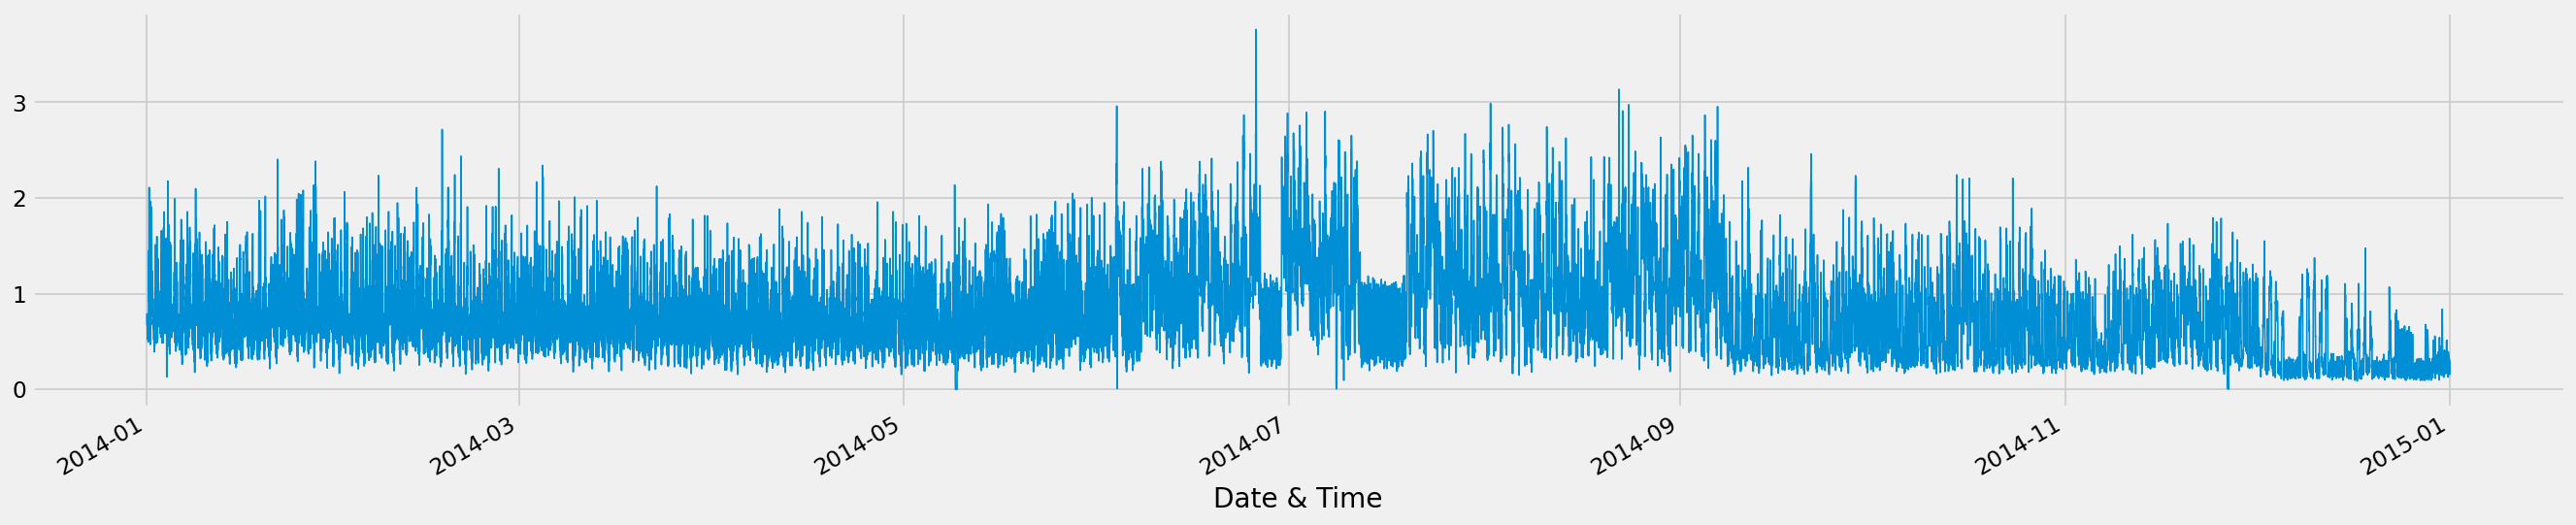

In [85]:
home_a['total'].plot(figsize=(25,5),logy=False, lw=1)

def plot_electricity(df, label="total", figsize=(25,5)):
    df[label].plot(figsize=figsize, lw=1)


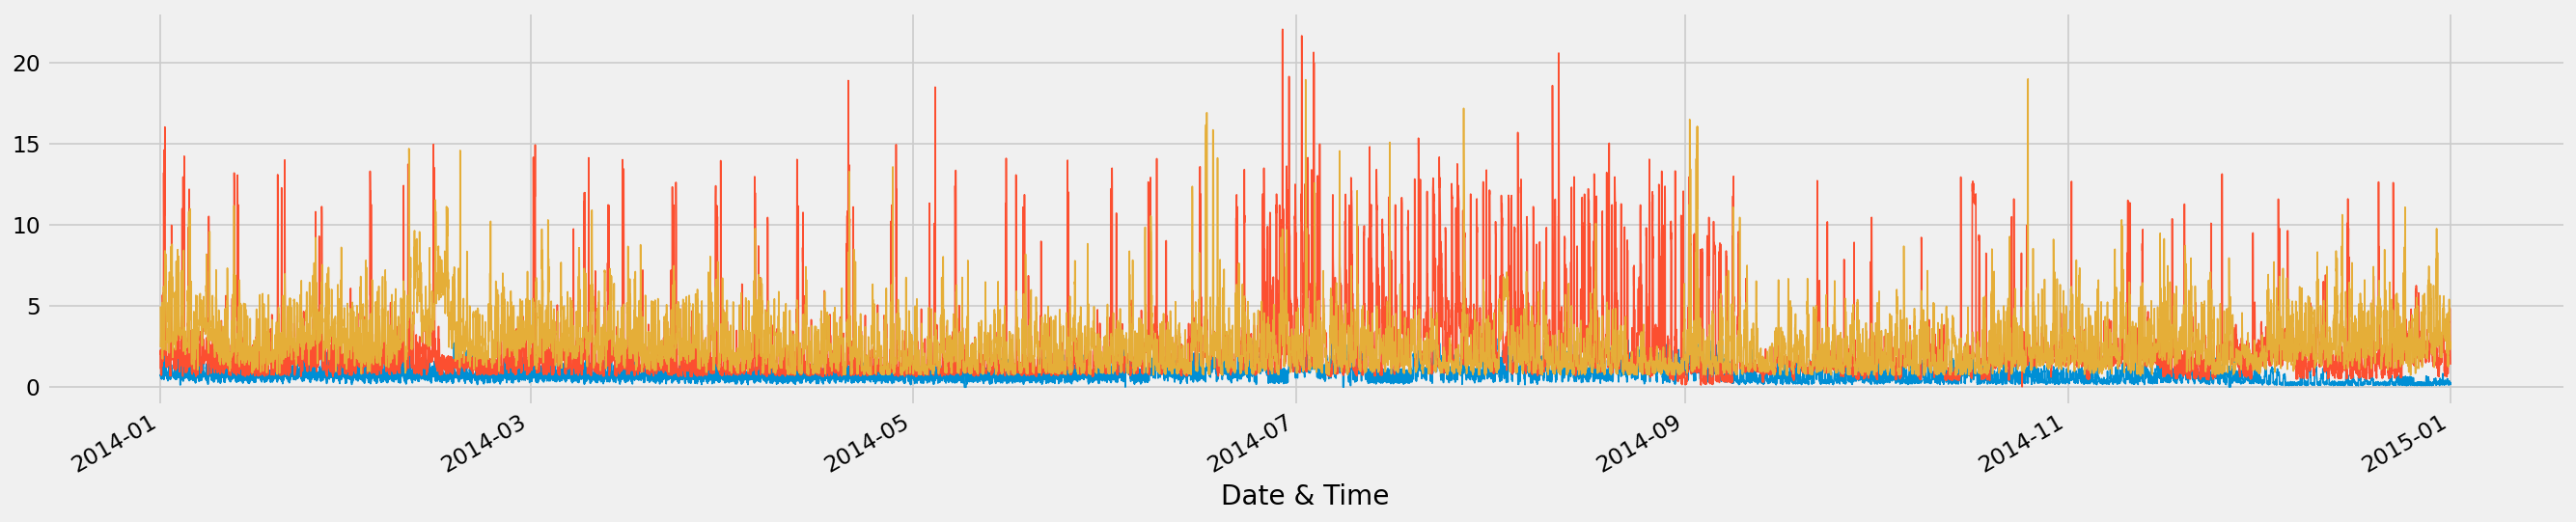

In [86]:
plot_electricity(home_a)
plot_electricity(home_b)
plot_electricity(home_c)

<AxesSubplot:xlabel='Date & Time'>

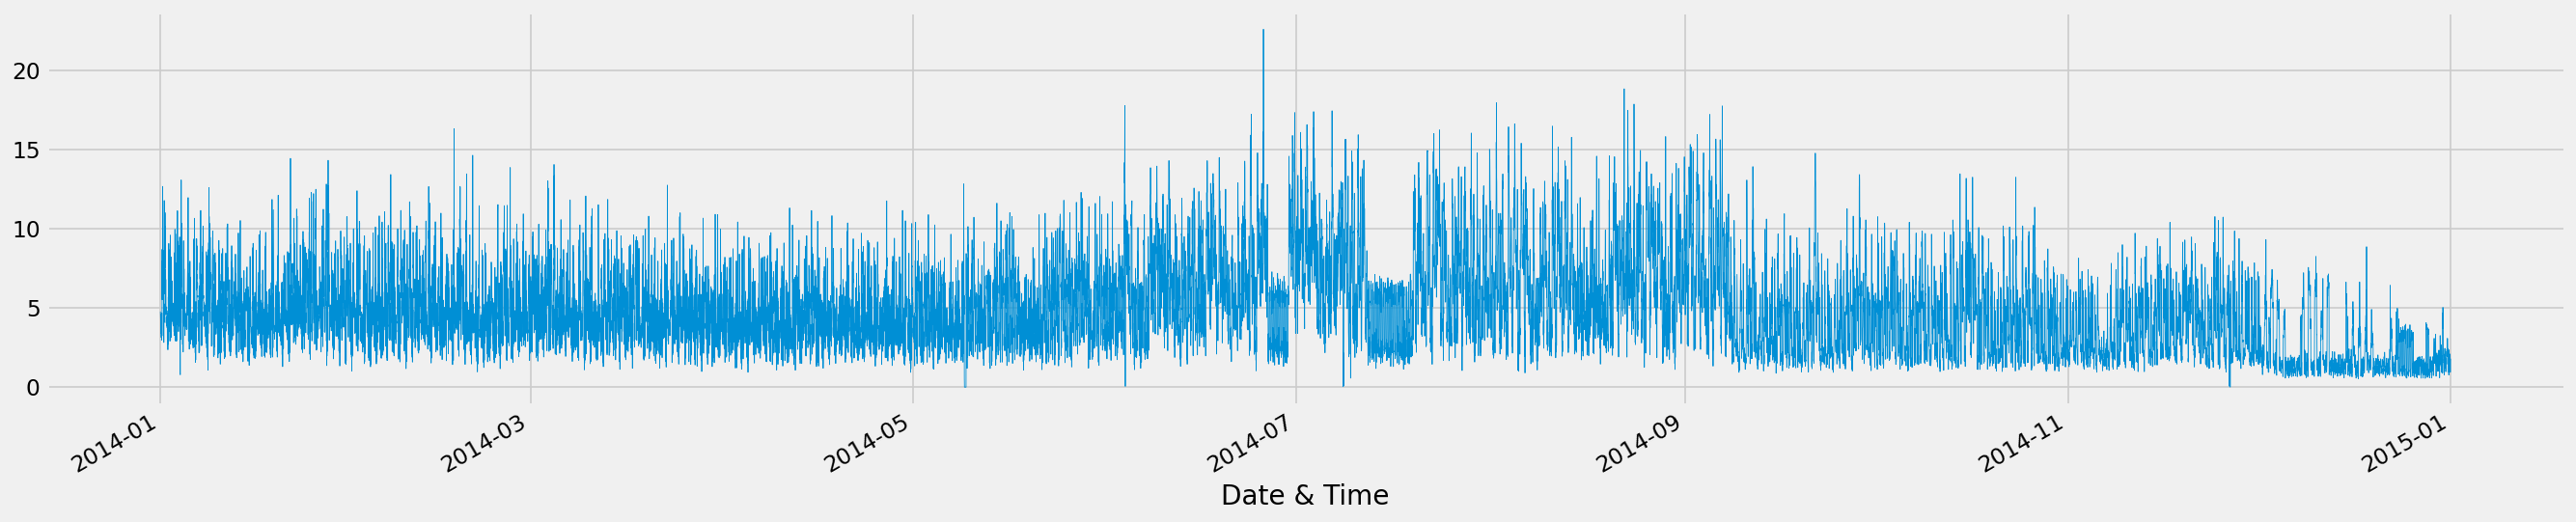

In [56]:
home_a['total'].plot(figsize=(25,5),lw=0.5)

### Simple ARIMA model

In [50]:
# simple ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [57]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(home_a['total'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.046519
p-value: 0.000000


In [69]:
# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(home_a['total']); axes[0, 0].set_title('Original Series')
# plot_acf(home_a['total'], ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(home_a['total'].diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(home_a['total'].diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(home_a['total'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(home_a['total'].diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

In [70]:
#Fitting the model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(home_a['total'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/t

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                17524
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -34068.326
Date:                Mon, 31 Jan 2022   AIC                          68144.652
Time:                        15:28:05   BIC                          68175.737
Sample:                             0   HQIC                         68154.888
                              - 17524                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9618      0.003   -334.255      0.000      -0.967      -0.956
ma.L1          0.6559      0.007     96.191      0.000       0.643       0.669
ma.L2         -0.0710      0.007    -10.350      0.0

### Some EDA 

In [87]:
home_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17524 entries, 2014-01-01 00:00:00 to 2014-12-31 23:30:00
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   use [kW]                     17524 non-null  float64
 1   gen [kW]_x                   17524 non-null  float64
 2   FurnaceHRV [kW]              17524 non-null  float64
 3   CellarOutlets [kW]           17524 non-null  float64
 4   WashingMachine [kW]          17524 non-null  float64
 5   FridgeRange [kW]             17524 non-null  float64
 6   DisposalDishwasher [kW]      17524 non-null  float64
 7   KitchenLights [kW]           17524 non-null  float64
 8   BedroomOutlets [kW]          17524 non-null  float64
 9   BedroomLights [kW]           17524 non-null  float64
 10  MasterOutlets [kW]           17524 non-null  float64
 11  MasterLights [kW]            17524 non-null  float64
 12  DuctHeaterHRV [kW]           17524 non-

In [88]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    # df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    # X = df[['hour','dayofweek','quarter','month','year',
    #        'dayofyear','dayofmonth']]
    # if label:
    #     y = df[label]
    #     return X, y
    # return X

# X, y = create_features(home_a, label='total')

# features_and_target = pd.concat([X, y], axis=1)

In [89]:
create_features(home_a)

In [90]:
home_a

,use [kW],gen [kW]_x,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],...,BasementOutdoorOutlets [kW],total,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.0,0.0,0.195338,0.083204,0.005686,0.006892,0.005569,0.012154,0.020452,0.004899,...,0.0,0.795101,2014-01-01 00:00:00,0,2,1,1,2014,1,1
2014-01-01 00:30:00,0.0,0.0,0.182158,0.036139,0.005679,0.094138,0.005412,0.005200,0.020571,0.008869,...,0.0,0.716727,2014-01-01 00:30:00,0,2,1,1,2014,1,1
2014-01-01 01:00:00,0.0,0.0,0.134808,0.047034,0.005635,0.014786,0.005510,0.003173,0.020516,0.004901,...,0.0,0.667612,2014-01-01 01:00:00,1,2,1,1,2014,1,1
2014-01-01 01:30:00,0.0,0.0,0.182125,0.071407,0.005672,0.082081,0.005445,0.003072,0.020506,0.004844,...,0.0,0.767058,2014-01-01 01:30:00,1,2,1,1,2014,1,1
2014-01-01 02:00:00,0.0,0.0,0.092988,0.014203,0.005570,0.031901,0.005401,0.003154,0.020412,0.004841,...,0.0,0.568542,2014-01-01 02:00:00,2,2,1,1,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 21:30:00,0.0,0.0,0.075843,0.064897,0.000071,0.000063,0.000050,0.000017,0.011409,0.004720,...,0.0,0.216711,2014-12-31 21:30:00,21,2,4,12,2014,365,31
2014-12-31 22:00:00,0.0,0.0,0.170588,0.022284,0.000154,0.000083,0.000061,0.000017,0.011306,0.004711,...,0.0,0.266411,2014-12-31 22:00:00,22,2,4,12,2014,365,31
2014-12-31 22:30:00,0.0,0.0,0.148785,0.072169,0.000156,0.000074,0.000056,0.000016,0.011294,0.004712,...,0.0,0.294144,2014-12-31 22:30:00,22,2,4,12,2014,365,31


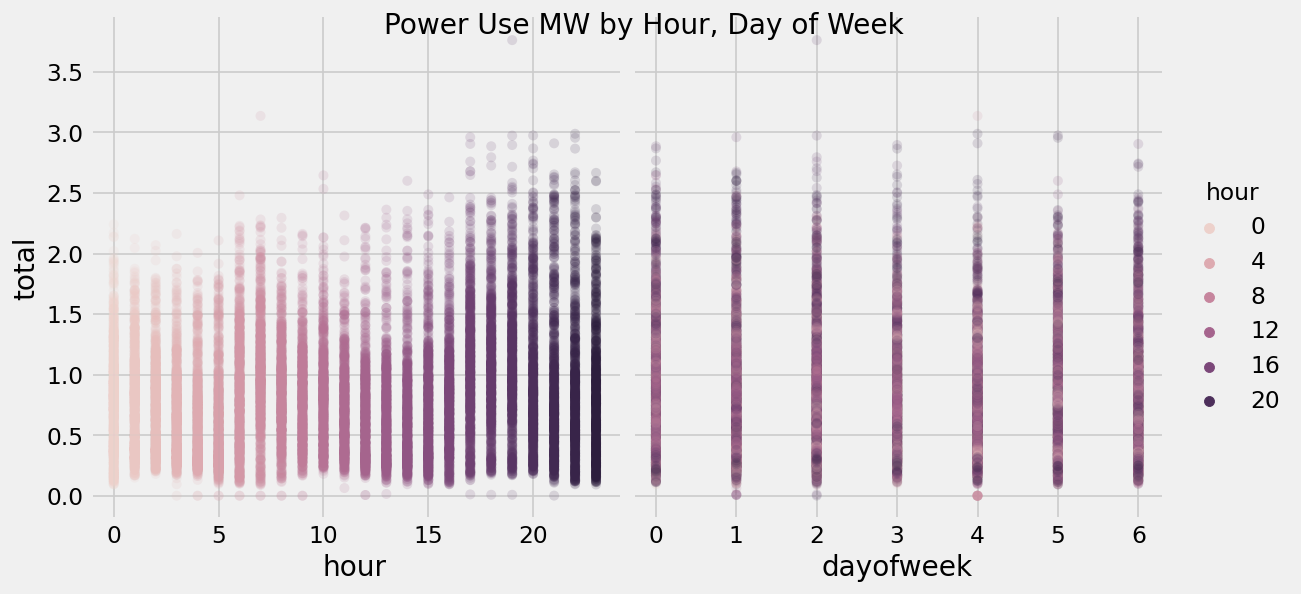

In [92]:

sns.pairplot(home_a.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek'],
             y_vars='total',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week')
plt.show()


### Forecasting using Prophet


In [93]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [94]:
#Split date
date= "2014-09-18"
X_train = home_a.loc[home_a.index<= date].copy()
X_test = home_a.loc[home_a.index> date].copy()

<AxesSubplot:xlabel='Date & Time'>

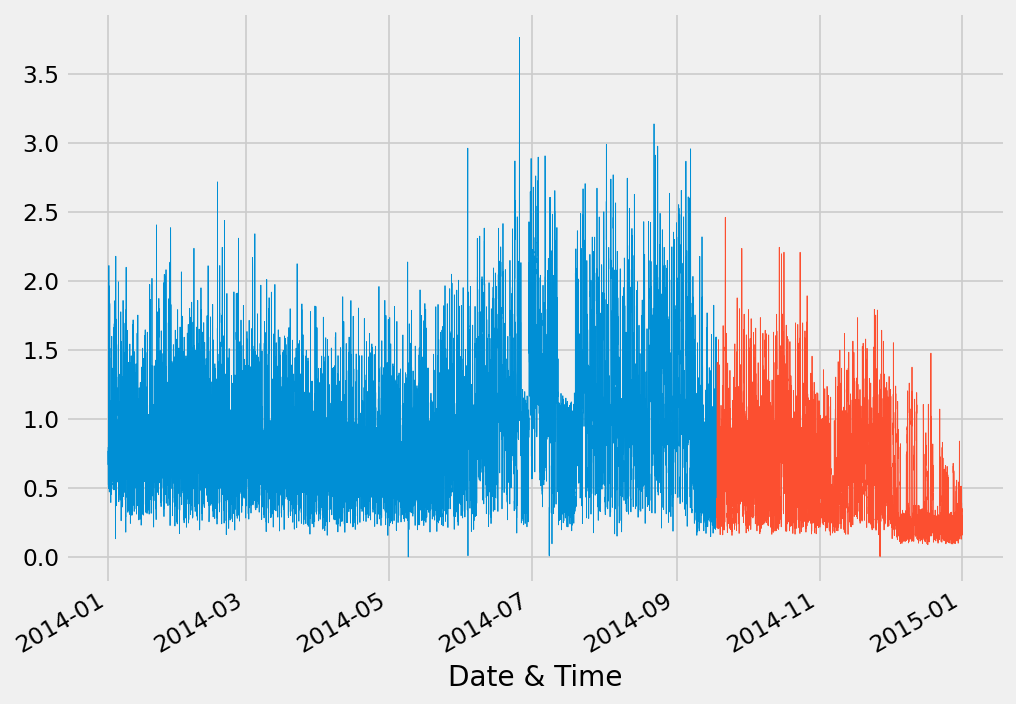

In [105]:
X_train['total'].plot(lw=0.5)
X_test['total'].plot(lw=0.5)

In [106]:
# # Plot train and test so you can see where we have split
# X_train \
#     .rename(columns={'total': 'TRAIN SET'}) \
#     .merge(X_test.rename(columns={'total': 'TEST SET'}),
#           how='outer') \
#     .plot(figsize=(15,5), title='Train/test split', style='.',alpha= 0.5)
# plt.show()

In [107]:
X_train['ds']= X_train.index
X_test['ds'] = X_test.index

X_train = X_train[['ds','total']]
X_test = X_test[['ds','total']]

In [108]:
# Format data for prophet model using ds and y
X_train.reset_index() \
    .rename(columns={
                     'total':'y'}).head()

,Date & Time,ds,y
0,2014-01-01 00:00:00,2014-01-01 00:00:00,0.795101
1,2014-01-01 00:30:00,2014-01-01 00:30:00,0.716727
2,2014-01-01 01:00:00,2014-01-01 01:00:00,0.667612
3,2014-01-01 01:30:00,2014-01-01 01:30:00,0.767058
4,2014-01-01 02:00:00,2014-01-01 02:00:00,0.568542


In [109]:
X_train =X_train.reset_index()
X_train= X_train[['ds','total']]
X_train =X_train.rename(columns={"total":"y"})


In [110]:
X_train

,ds,y
0,2014-01-01 00:00:00,0.795101
1,2014-01-01 00:30:00,0.716727
2,2014-01-01 01:00:00,0.667612
3,2014-01-01 01:30:00,0.767058
4,2014-01-01 02:00:00,0.568542
...,...,...
12474,2014-09-17 22:00:00,1.259534
12475,2014-09-17 22:30:00,0.561248
12476,2014-09-17 23:00:00,0.329142
12477,2014-09-17 23:30:00,0.340821


In [119]:
model= Prophet(interval_width=0.95)
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -118.185


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       21364.9    0.00237516       114.066      0.3992      0.9678      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       21367.2   8.41628e-05        52.545      0.6845      0.6845      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       21367.6   5.62759e-05       76.4444   3.503e-07       0.001      333  LS failed, Hessian reset 
     239       21367.7   0.000224119       149.748   4.299e-06       0.001      388  LS failed, Hessian reset 
     299       21367.9   0.000703793       123.143      0.1617      0.5807      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314         21368   5.29458e-05       87.8228   5.675e-07       0.001      531  LS failed, Hessian reset 
     399       21368.2   0.000295648  

In [120]:
X_test = X_test.reset_index().rename(columns={'total':'y'})

X_test=X_test[['ds','y']]

In [121]:
prediction= model.predict(X_test)

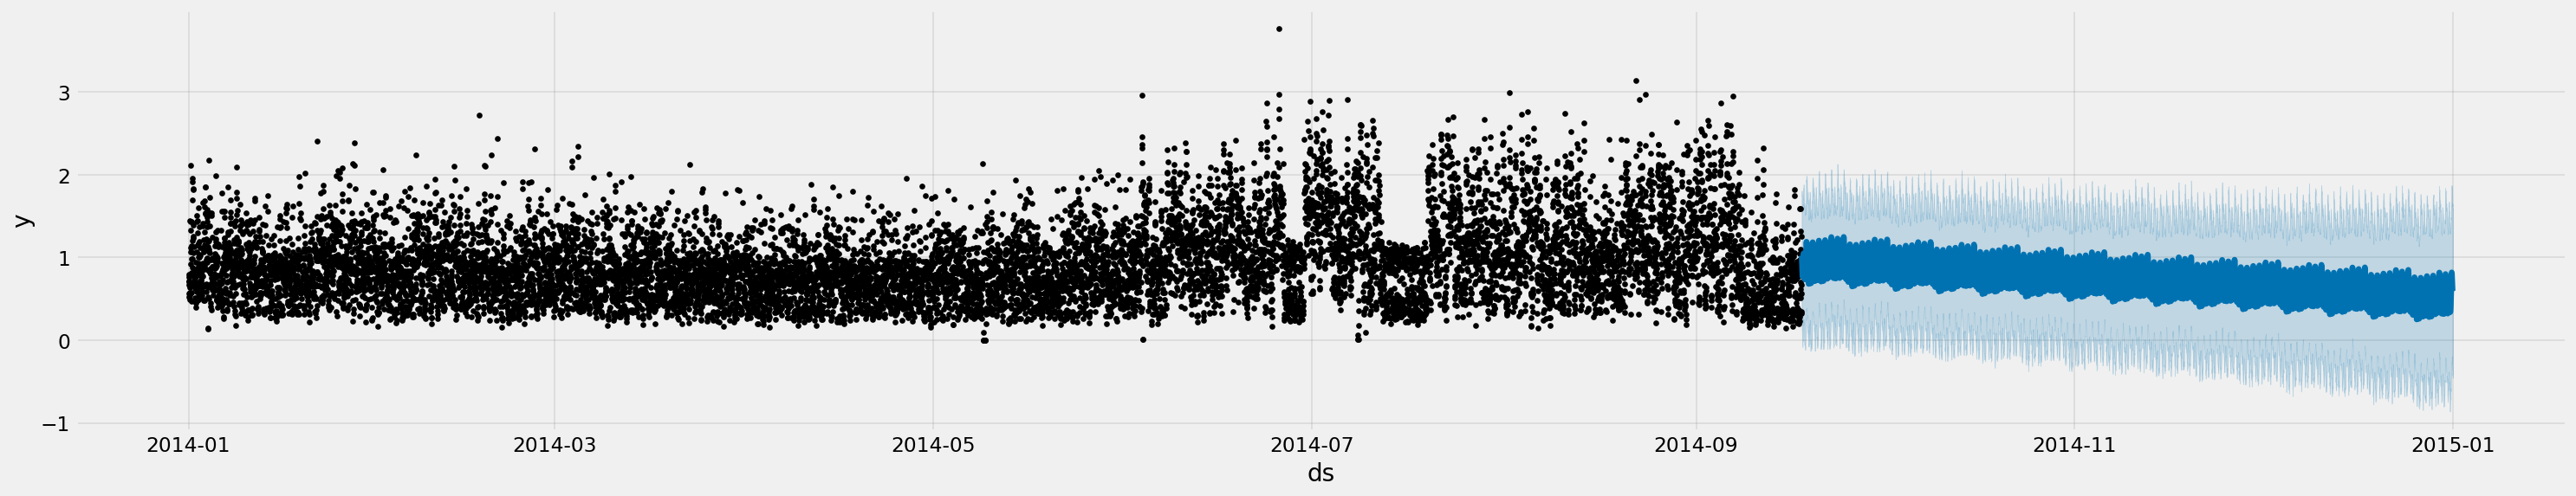

In [122]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(25)
fig = model.plot(prediction,
                 ax=ax)
plt.show()

<AxesSubplot:>

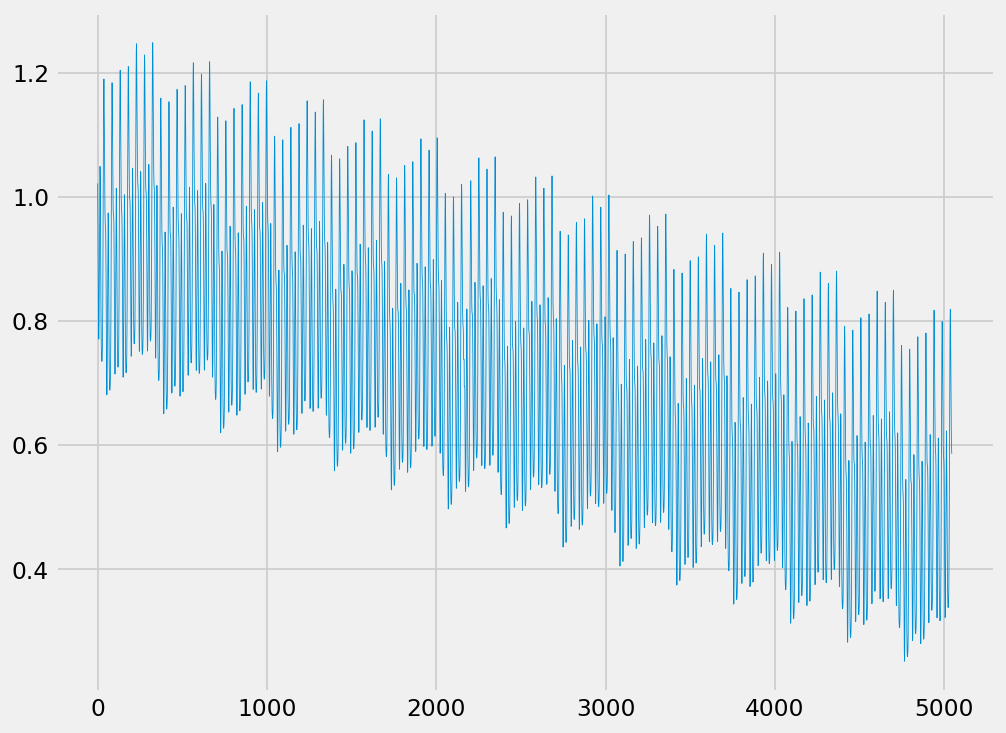

In [123]:
prediction['yhat'].plot(lw=0.5)

### Using XGBoost for Time Series data

In [125]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit

In [126]:
split_date = "2014-09-18"
home_train = home_a.loc[home_a.index <=split_date].copy()
home_test = home_a.loc[home_a.index >split_date].copy()

In [140]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    cols= df.columns
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X, cols


In [145]:
home_a.columns

Index(['use [kW]', 'gen [kW]_x', 'FurnaceHRV [kW]', 'CellarOutlets [kW]',
       'WashingMachine [kW]', 'FridgeRange [kW]', 'DisposalDishwasher [kW]',
       'KitchenLights [kW]', 'BedroomOutlets [kW]', 'BedroomLights [kW]',
       'MasterOutlets [kW]', 'MasterLights [kW]', 'DuctHeaterHRV [kW]',
       'gen [kW]_y', 'ElectricRange [kW]', 'Dryer [kW]',
       'GarageMudroomLights [kW]', 'DiningRoomOutlets [kW]',
       'MudroomOutlets [kW]', 'MasterBathOutlets [kW]', 'GarageOutlets [kW]',
       'BasementOutdoorOutlets [kW]', 'total', 'date', 'hour', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth'],
      dtype='object')

In [142]:
X_train, y_train = create_features(home_train, label="total")
X_test, y_test = create_features(home_test, label="total")

In [133]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:0.51615	validation_1-rmse:0.35872
[1]	validation_0-rmse:0.44435	validation_1-rmse:0.35752
[2]	validation_0-rmse:0.40159	validation_1-rmse:0.36009
[3]	validation_0-rmse:0.37084	validation_1-rmse:0.37269
[4]	validation_0-rmse:0.35457	validation_1-rmse:0.37718
[5]	validation_0-rmse:0.34055	validation_1-rmse:0.37827
[6]	validation_0-rmse:0.33238	validation_1-rmse:0.38876
[7]	validation_0-rmse:0.32660	validation_1-rmse:0.39788
[8]	validation_0-rmse:0.32276	validation_1-rmse:0.40763
[9]	validation_0-rmse:0.31723	validation_1-rmse:0.40731
[10]	validation_0-rmse:0.31338	validation_1-rmse:0.40711
[11]	validation_0-rmse:0.31111	validation_1-rmse:0.40661
[12]	validation_0-rmse:0.30857	validation_1-rmse:0.40910
[13]	validation_0-rmse:0.30545	validation_1-rmse:0.40902
[14]	validation_0-rmse:0.30319	validation_1-rmse:0.40841
[15]	validation_0-rmse:0.30206	validation_1-rmse:0.41010
[16]	validation_0-rmse:0.30022	validation_1-rmse:0.41426
[17]	validation_0-rmse:0.29931	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

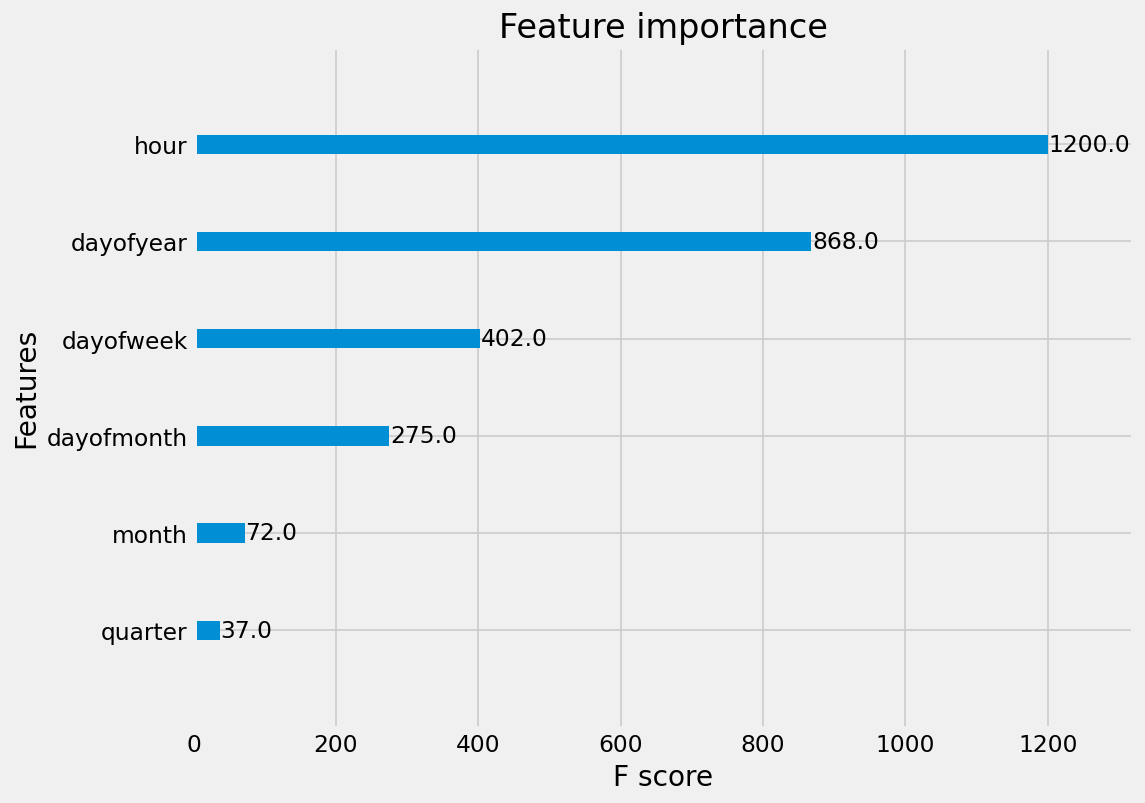

In [134]:
xgb.plot_importance(reg)

In [135]:
home_test['prediction'] = reg.predict(X_test)

In [136]:
home_all= pd.concat([home_train, home_test], sort=False)

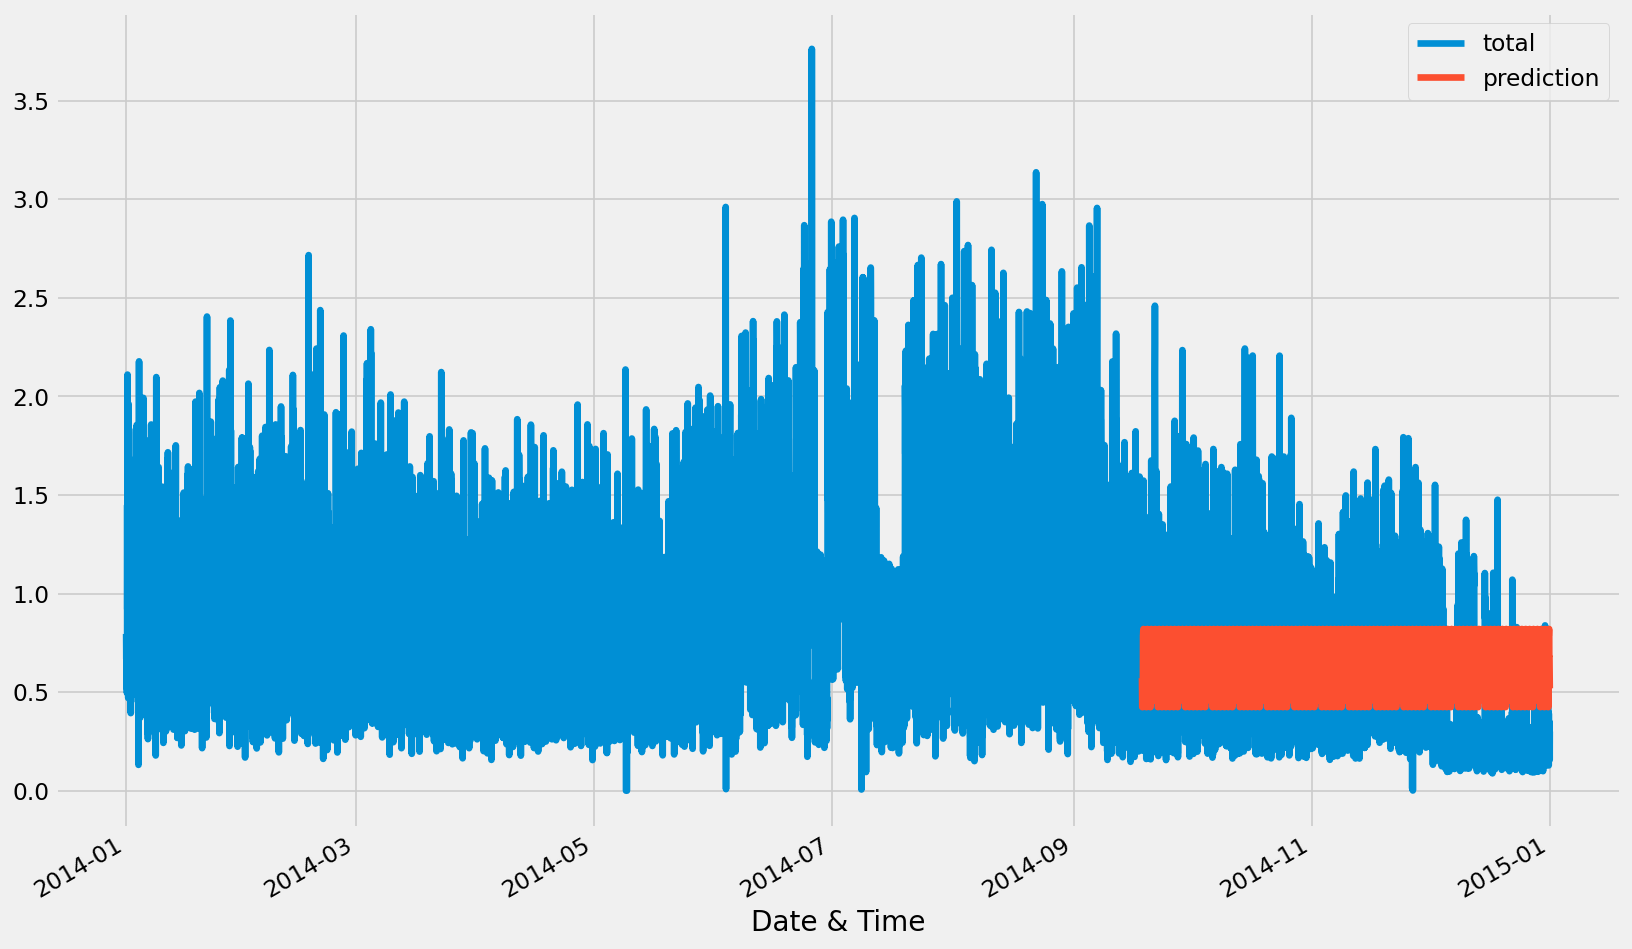

In [137]:
_=home_all[['total','prediction']].plot(figsize=(15,10))

In [29]:
home_all['prediction'].describe()

count    5041.000000
mean        0.550318
std         0.101358
min         0.412330
25%         0.509281
50%         0.530836
75%         0.605623
max         0.799171
Name: prediction, dtype: float64

### Using LSTMs 